In [1]:
import pandas as pd
import numpy as np

In [4]:
origin = pd.read_csv('machine.csv')

In [5]:
display(origin)

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [6]:
origin.columns = ['vendor_name','model name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

In [8]:
df = origin.copy().drop('model name',axis=1)

In [10]:
display(df)

,vendor_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,125,256,6000,256,16,128,198,199
1,amdahl,29,8000,32000,32,8,32,269,253
2,amdahl,29,8000,32000,32,8,32,220,253
3,amdahl,29,8000,32000,32,8,32,172,253
4,amdahl,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...
204,sperry,124,1000,8000,0,1,8,42,37
205,sperry,98,1000,8000,32,2,8,46,50
206,sratus,125,2000,8000,0,2,14,52,41
207,wang,480,512,8000,32,0,0,67,47


In [11]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='ERP', ylabel='vendor_name'>

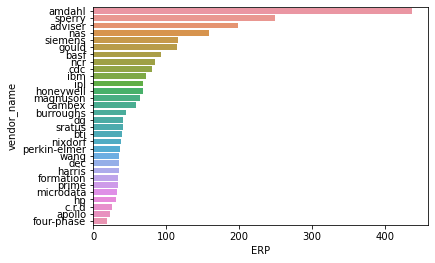

In [28]:
df_vendor = df.groupby(['vendor_name']).ERP.mean().reset_index().sort_values('ERP',ascending=False)
sns.barplot(data=df_vendor,
            x = 'ERP',
            y = 'vendor_name')

<AxesSubplot:xlabel='ERP', ylabel='vendor_name'>

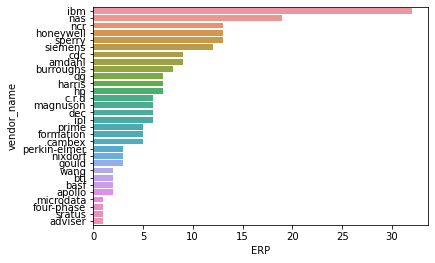

In [27]:
df_vendor = df.groupby(['vendor_name']).ERP.count().reset_index().sort_values('ERP',ascending=False)
sns.barplot(data=df_vendor,
            x = 'ERP',
            y = 'vendor_name')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor_name  209 non-null    object
 1   MYCT         209 non-null    int64 
 2   MMIN         209 non-null    int64 
 3   MMAX         209 non-null    int64 
 4   CACH         209 non-null    int64 
 5   CHMIN        209 non-null    int64 
 6   CHMAX        209 non-null    int64 
 7   PRP          209 non-null    int64 
 8   ERP          209 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 14.8+ KB


In [30]:
df[pd.isnull(df)].sum()

vendor_name      0
MYCT           0.0
MMIN           0.0
MMAX           0.0
CACH           0.0
CHMIN          0.0
CHMAX          0.0
PRP            0.0
ERP            0.0
dtype: object

<AxesSubplot:>

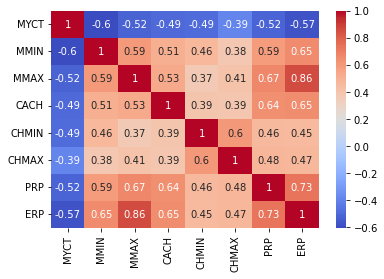

In [45]:
data = df.drop('vendor_name',axis=1).corr(method = 'kendall')
sns.heatmap(data = data,
            annot = data,
            cmap = 'coolwarm')

<AxesSubplot:>

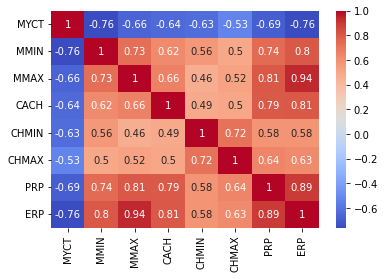

In [46]:
data = df.drop('vendor_name',axis=1).corr(method='spearman')
sns.heatmap(data = data,
            annot = data,
            cmap = 'coolwarm')

<AxesSubplot:>

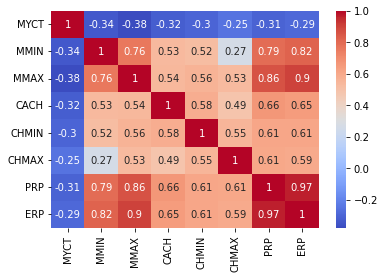

In [47]:
data = df.drop('vendor_name',axis=1).corr(method='pearson')
sns.heatmap(data = data,
            annot = data,
            cmap = 'coolwarm')

In [ ]:
fig, ax = plt.subplots(1,3)

pearson = sns.heatmap(data = df.drop('vendor_name',axis=1).corr(method='pearson'),
            annot = df.drop('vendor_name',axis=1).corr(method='pearson'),
            cmap = 'coolwarm')
pearson.set_title = 'PEARSON'

spearman = sns.heatmap(data = df.drop('vendor_name',axis=1).corr(method='spearman'),
            annot = df.drop('vendor_name',axis=1).corr(method='spearman'),
            cmap = 'coolwarm')
spearman.set_title = 'SPEARMAN'